In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace=True)

- drop null values

In [8]:
df.shape

(480, 13)

In [9]:
df.drop(columns='Loan_ID',axis=1,inplace=True)

In [10]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# Univariate analysis

<AxesSubplot:>

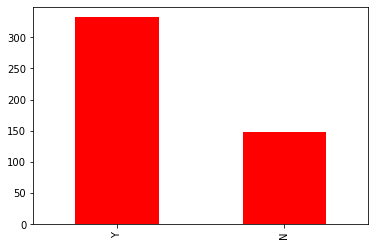

In [11]:
df['Loan_Status'].value_counts().plot(kind='bar',color='r')

<AxesSubplot:ylabel='Gender'>

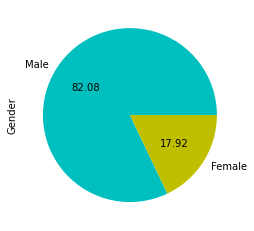

In [12]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f',colors='cyan')

<AxesSubplot:ylabel='Married'>

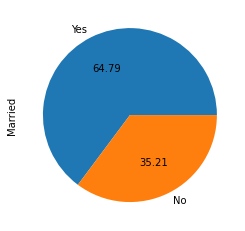

In [13]:
df['Married'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:>

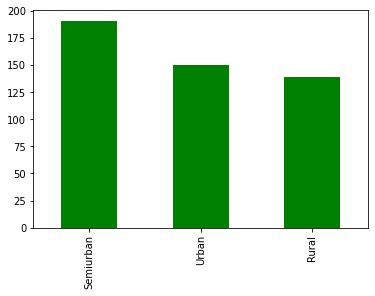

In [14]:
df['Property_Area'].value_counts().plot(kind='bar',color = 'green')

<AxesSubplot:>

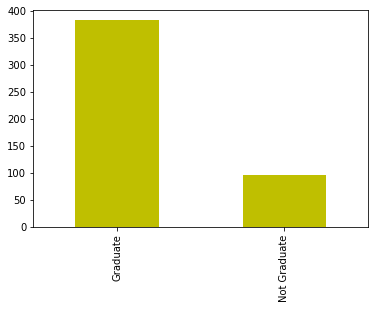

In [15]:
df['Education'].value_counts().plot(kind='bar',color = 'y')

<AxesSubplot:>

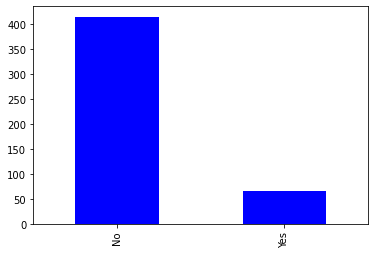

In [16]:
df['Self_Employed'].value_counts().plot(kind='bar',color = 'b')

<AxesSubplot:ylabel='Frequency'>

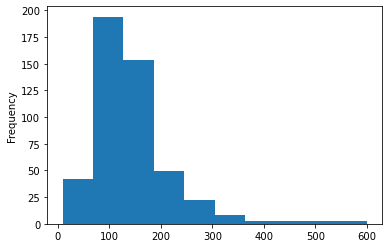

In [17]:
df['LoanAmount'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

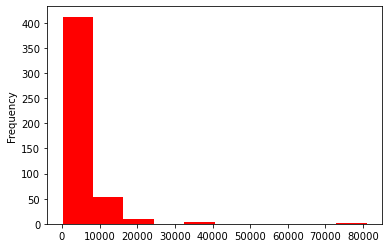

In [18]:
df['ApplicantIncome'].plot(kind='hist',color = 'r')

<AxesSubplot:>

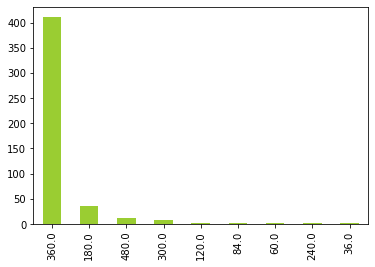

In [19]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar',color='yellowgreen')

# Bivariate analysis

<AxesSubplot:>

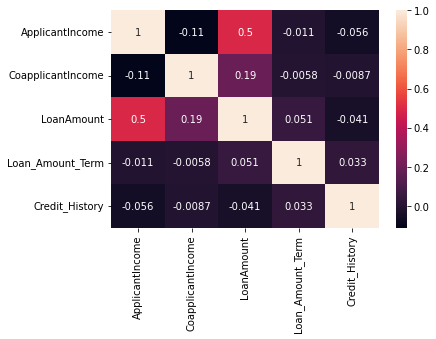

In [20]:
Corr = df.corr()
sns.heatmap(Corr,annot=True)

- Apllicantincome & coapplicantincome are highly correlated with loanamount 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

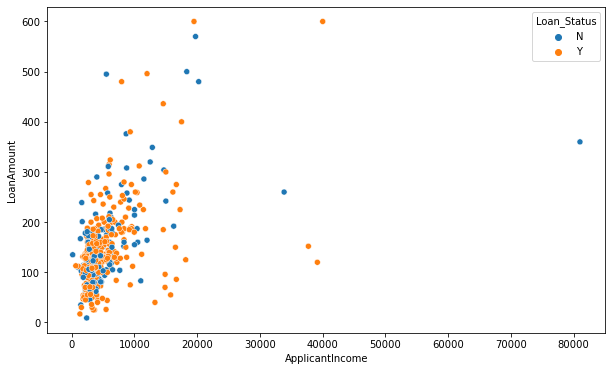

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

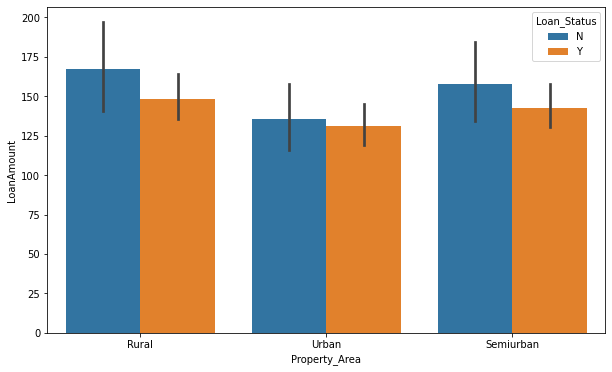

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Property_Area',y='LoanAmount',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

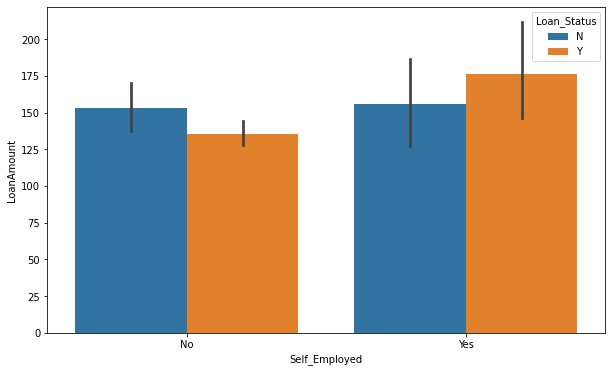

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Self_Employed',y='LoanAmount',data=df,hue='Loan_Status')

# Data preprocessing

In [24]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype('int')

In [25]:
df['Dependents']

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: int32

In [26]:
catgorical_features = df.select_dtypes('O')
catgorical_features

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
5,Male,Yes,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


In [27]:
from sklearn.preprocessing import LabelEncoder 

In [28]:
le = LabelEncoder()
for i in catgorical_features:
    catgorical_features[i] = le.fit_transform(catgorical_features[i])


In [29]:
catgorical_features

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
5,1,1,0,1,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [30]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [31]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0
5,2,5417,4196.0,267.0,360.0,1.0


In [32]:
df1=pd.concat([df,catgorical_features],axis=1)

In [33]:
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,2,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,2,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,2,1


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
names = df1.columns
d = scaler.fit_transform(df1)
scale_df = pd.DataFrame(d, columns = names)

In [35]:
scale_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.333333,0.054830,0.044567,0.201354,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.035250,0.000000,0.096447,0.72973,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.000000,0.030093,0.069687,0.187817,0.72973,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.000000,0.072356,0.000000,0.223350,0.72973,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.666667,0.065145,0.124006,0.436548,0.72973,1.0,1.0,1.0,0.0,1.0,1.0,1.0


# Model Building 

In [43]:
X = scale_df.iloc[:,:-1]
y= scale_df.iloc[:,-1]

In [44]:
X.head(1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
0,0.333333,0.05483,0.044567,0.201354,0.72973,1.0,1.0,1.0,0.0,0.0,0.0


# Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5)

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k=15

cv= StratifiedKFold(n_splits=k,random_state = 1,shuffle= True)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)


In [56]:
print('Accuracy: %.3f' % (np.max(scores)*100))

Accuracy: 87.500
